# 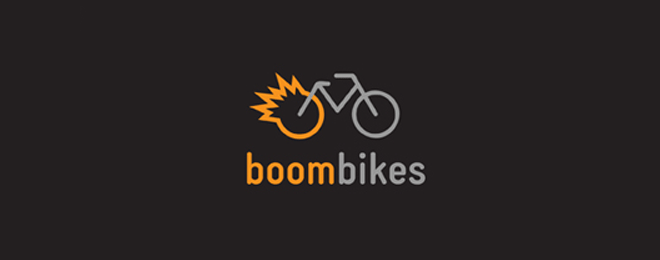

## <font color = blue> Problem Statement </font>

**`BoomBikes`** is a USA bike-sharing provider in which bikes are made available for shared use to individuals on a short term basis for a price. They have suffered considerable dips in their revenue during covid time and therefore in order to maximize their revenue, they aspires to understand the factors/features on which the demand for these shared bikes depends, specifically in the USA market. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
<br><br>
**The company wants to know :**<br> 
1. Which variables are significant in predicting the demands for shared bikes. <br> 
2. How well those variables describe the bike demands.

<hr>

## <font color = blue> Importing Libraries and Settings </font>

In [1]:
#Importing Libraries
import pandas as pd # For data manipulation and to create charts
import numpy as np # For data manipulation
import matplotlib.pyplot as plt # To create charts for data visualization
import seaborn as sns  # To create charts for data visualization
import datetime as dt # To handle complex functionalities involving the date and time
from sklearn.model_selection import train_test_split # To split traning and test dataset for regression modelling
from sklearn.preprocessing import StandardScaler # To standardize the features
from sklearn.feature_selection import RFE # Importing RFE for automatic features selection
from sklearn.linear_model import LinearRegression # Importing LinearRegression
import statsmodels.api as sm  # To build linear regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor # Check for the VIF values of the feature variables.
from sklearn.metrics import r2_score # to calculate r2 score between predicted vs observed response variable
from sklearn.metrics import mean_squared_error #to calculate the mean square error

In [2]:
#This Setting will ignore all warnings
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#This setting would allow you to see all columns available in your dataframe or all rows in a series output
pd.set_option('display.max_columns', None) # Set the display option to show all columns
pd.set_option('display.max_rows', None) # Set the display option to show all rows
pd.set_option('display.max_colwidth', None) # Set the maximum column width to show all the column information

<font color = green> **Summary:** </font> All the libraries and settings are correctly imported

<hr>

## <font color = blue> Sanity Checks on Imported Data </font>

**Importing the BikeBoom data**

In [4]:
bike = pd.read_csv('day.csv')

**To check if all the data variables imported correctly or not**

- **To check for Bad lines-** If number of rows in Jupyter is greater than number of rows of raw data<br>
- **To check of unwanted column/s-** If number of columns in Jupyter is greater than number of columns of raw data

In [5]:
bike.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [6]:
bike.shape

(730, 16)

**To check if there is any shift of values because of any unwanted comma/delimiter**

- In order to check the value shift, We have checked total count of missing values in 'cnt' variable in both raw data and Jupyter data, which is also our target variable.<br>
- 'cnt' variable is the last non-missing column available in the raw data thus used for this analysis

In [7]:
bike.cnt.isnull().sum()

0

**Set `instant` as Index**

In [8]:
# 'instant' is an unique identification variable as all values are unique and in series
(bike.instant.nunique())/len(bike)*100

100.0

In [9]:
# we have set this variable as index 
bike.set_index(['instant'], inplace = True)

In [10]:
bike.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


**`NONE` or `NA` Value Correction**<br>
- Python does not identify 'NONE' value as missing value by itself so we will have to check if there is any 'NONE' record present in the raw data<br>
- Python identify 'NA' value as missing value. However in the raw data, NA value may represents some other information so we will have to check if any 'NA' record present in the raw data.

In [11]:
bike.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

<font color = green> **Comments:** </font> <br>
1. All the rows and columns of data are imported correctly. No bad lines or unwanted columns observed<br>
2. There is no shift of values because of any unwanted delimiter as no missing value presents in 'cnt' variable.<br>
3. No 'None' or 'NA' value correction is required because all the variables in the data are integer or float in nature.

<hr>

## <font color = blue> Univariate analysis on Target variable</font>

**1) No missing value in the target variable found**

In [12]:
bike.cnt.isnull().sum()

0

**2) No Outlier present in the Target variable**

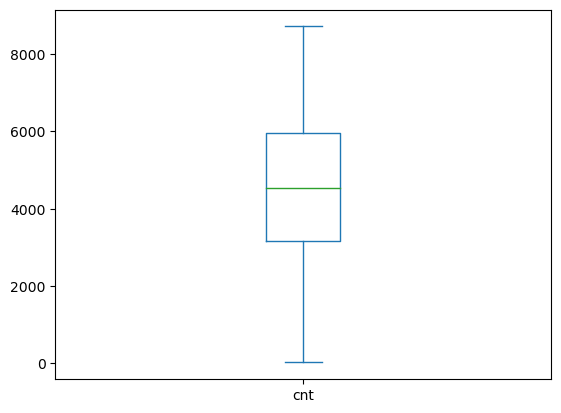

In [13]:
bike.cnt.plot.box()
plt.show()

<hr>

## <font color = blue> Treatment of Missing Values and Irrelevant Variables</font>


#### 1) Deleting Variables having single constant value

- These variables do not impact the outcome of the target variable therefore, deleted.<br>
- No variable present

In [14]:
a=pd.DataFrame(bike.nunique()).reset_index()
a.sort_values(by=[0])

,index,0
2,yr,2
4,holiday,2
6,workingday,2
7,weathersit,3
1,season,4
5,weekday,7
3,mnth,12
8,temp,498
10,hum,594
12,casual,605



#### 2) Deleting Variables with all unique values

- These variables are identification nominal variable which has all unique values therefore it will not have any impact on the target variable.<br>
- dteday is identification variable as it has all unique date values

In [15]:
(bike.nunique())/len(bike)*100

dteday        100.000000
season          0.547945
yr              0.273973
mnth            1.643836
holiday         0.273973
weekday         0.958904
workingday      0.273973
weathersit      0.410959
temp           68.219178
atemp          94.383562
hum            81.369863
windspeed      88.904110
casual         82.876712
registered     92.876712
cnt            95.205479
dtype: float64

**`dteday:`** 'dteday' is an identification variable which can be used to derive variables like month, year and weekday. However, these derived variables (**mnth, yr, weekday respectively**) are already present in the dataset and no further information can be derived from 'dteday' thus excluding it from further analysis. Also regression modelling requires all predictors variables to be independent which is not true in case of 'dteday' as it can be explained by above mentioned derived variables.

In [16]:
bike.drop('dteday', axis=1, inplace= True)

#### 3) Deleting Other Irrelevant Columns

**`casual and registered:`** Based on data dictionary, these variables completely derive our target variable 'cnt'. These two variables are output variables which represents the bike demand. Thus, these are not predictors.  

In [17]:
bike.drop(['casual', 'registered'], axis=1, inplace= True)

#### 4) Keeping unique rows in the data

Duplicate rows only add noise in the data. Thus removing the same.

In [18]:
# Number of rows before deleting duplicate rows
bike.shape

(730, 12)

In [19]:
# Deleting Duplicate Rows
bike.drop_duplicates(inplace = True)

There is no duplicate record available in the data.

In [20]:
# Number of rows after deleting duplicate rows.
bike.shape

(730, 12)

#### 5) Missing values treatment

In [21]:
#Checking all the variables in the data with missing values along with missing count
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<font color = green> **Observations:** </font> Missing value treatment is not required as there is no missing value present in the whole data

<hr>

## <font color = blue> Correcting the Data-types and Values </font>

In [22]:
bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


**`a) season`** : season is a `nominal categorical variable` thus season value of 1, 2, 3 and 4 mis-represent this variable as interval categorical variable. Therefore providing the labels based on data dictionary- <br><br>
- 1: spring, 2: summer, 3: fall, 4: winter

In [23]:
bike.season = bike.season.apply(lambda x: 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else 'winter' if x == 4 else None)

**`b) weathersit`** : weathersit is a `nominal categorical variable` thus weathersit value of 1, 2, 3 and 4 mis-represent this variable as interval categorical variable. Therefore providing the labels based on data dictionary-<br>
- 1: `Clear`, Few clouds, Partly cloudy, Partly cloudy<br>
- 2: `Mist` + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
- 3: `Light Snow`, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
- 4: `Heavy Rain` + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>

In [24]:
bike.weathersit = bike.weathersit.apply(lambda x: 'Clear' if x == 1 else 'Mist' if x == 2 else 'Light Snow' if x == 3 else 'Heavy Rain' if x == 4 else None)

**`c) yr`** : yr is an `ordinal categorical variable.` Providing the labels based on data dictionary- <br>
- 0: 2018, 1: 2019

In [25]:
bike.yr = bike.yr.apply(lambda x: 2018 if x == 0 else 2019 if x == 1 else None)

**`d) mnth`** : mnth is an `nominal categorical variable.` which represents the month of the year. In the raw data numeric sequence from 1 to 12 is provided. Providing the correct labelling- <br>
- 1: January to 12: December

In [26]:
bike.mnth = bike.mnth.apply(lambda x: '01 Jan' if x == 1 else 
                                    '02 Feb' if x == 2 else
                                    '03 Mar' if x == 3 else
                                    '04 Apr' if x == 4 else
                                    '05 May' if x == 5 else
                                    '06 Jun' if x == 6 else
                                    '07 Jul' if x == 7 else
                                    '08 Aug' if x == 8 else
                                    '09 Sep' if x == 9 else
                                    '10 Oct' if x == 10 else
                                    '11 Nov' if x == 11 else
                                    '12 Dec' if x == 12 else None)

**`e) weekday`** : weekday is a `nominal categorical variable.` which represents the weekday. In the raw data numeric sequence from 0 to 6 is provided with 0 being Sunday and 6 being Saturday. Weekdays information can be inferred from  **'workingday'** and **'holiday'** variables. Providing the correct labelling- <br>
- 0: Sunday to 6: Saturday

In [27]:
bike.weekday = bike.weekday.apply(lambda x: '07 Sun' if x == 0 else 
                                    '01 Mon' if x == 1 else
                                    '02 Tue' if x == 2 else
                                    '03 Wed' if x == 3 else
                                    '04 Thu' if x == 4 else
                                    '05 Fri' if x == 5 else
                                    '06 Sat' if x == 6 else None)

In [28]:
bike.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,2018,01 Jan,0,06 Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
2,spring,2018,01 Jan,0,07 Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
3,spring,2018,01 Jan,0,01 Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


<hr>

## <font color = blue> Identifying Qualitative and Quantitative variables </font>

In the data, **Qualitative numeric variables** are identified based on their unique values. This process is required in order to segregate Quantitative and Qualitative variables.

In [29]:
# checking unique values of all numerical variables
bike.select_dtypes(include = [np.number]).nunique()

yr              2
holiday         2
workingday      2
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

Numeric variables with less than 12 unique values can be safely assumed as numerical qualitative variables. Thus, converting their datatype to 'object'

In [30]:
to_be_obj = ['yr', 'holiday', 'workingday']

In [31]:
## Typecast to Categorical column
bike[to_be_obj] = bike[to_be_obj].astype('object')

#### Quantitative variables

In [32]:
quant_cols = bike.select_dtypes(include = [np.number]).columns.tolist()
quant_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#### Qualitative variables

In [33]:
qual_cols = bike.select_dtypes(include = ['object']).columns.tolist()
qual_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

<hr>

## <font color = blue> Outliers Treatment of Quantitative Predictors</font>

In order to identify the outliers, we have analysed below p5 and above p95 quantiles values along with other statistics like mean, median, std, etc. For this purpose, we have created statistics summary table of all quantitative variables. We have also created Box-plot to visualize the spread of data.

In [34]:
# Creating below p5 and above p95 quantiles
quantile = list(np.arange(0.01, 0.06, .01)) + list(np.arange(0.95, 0.99, .01))

#### Creating statistics summary table for outlier detection

In [35]:
round(bike[quant_cols].describe(percentiles= quantile).transpose(), 2)

,count,mean,std,min,1%,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,max
temp,730.0,20.32,7.51,2.42,5.99,6.89,7.46,8.05,8.75,20.47,31.52,31.80,32.05,33.00,33.87,35.33
atemp,730.0,23.73,8.15,3.95,7.29,8.11,9.41,10.22,11.03,24.37,35.75,36.21,36.63,37.44,38.94,42.04
hum,730.0,62.77,14.24,0.00,31.21,35.76,38.10,40.01,40.74,62.62,86.87,88.12,89.54,90.83,92.80,97.25
windspeed,730.0,12.76,5.20,1.50,3.55,4.15,4.46,4.92,5.33,12.13,23.00,23.30,24.00,25.20,27.38,34.00
cnt,730.0,4508.01,1936.01,22.00,689.38,971.76,1025.18,1162.80,1330.00,4548.50,7576.40,7661.16,7733.39,7867.10,8163.81,8714.00


#### Creating Box-plot to visualize the spread of the data

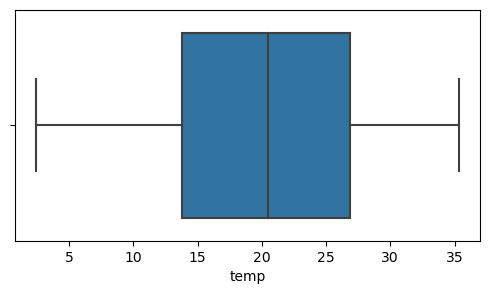

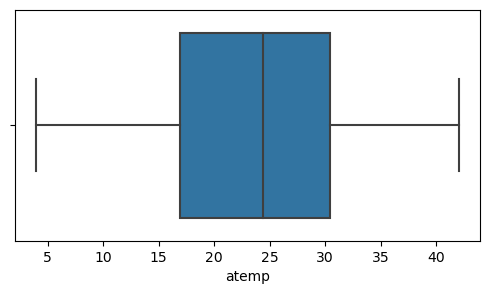

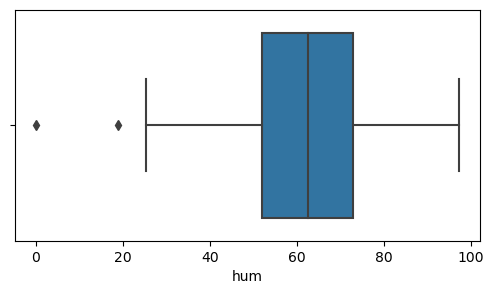

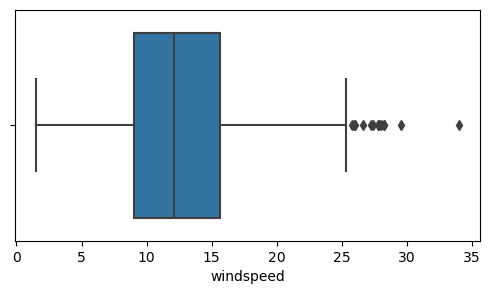

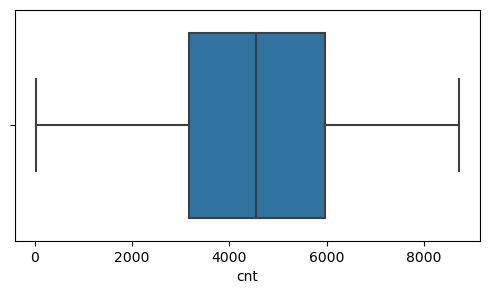

In [36]:
for col in quant_cols:
    plt.figure(figsize = (6,3))
    sns.boxplot(x = bike[col])
    plt.show()

<font color = green> **Observations:** </font> By analysing the box-plot and statistics summary table, we have detected outliers in **'hum'** variable which represents humidity and in **'windspeed'** variable which represents wind speed.

**1. hum:** Humidity value of zero looks suspicious. It is theoretically possible but it is impossible to achieve on the earth climate therefore records with humidity zero introduce data quality issue thus removing these records.

In [37]:
bike = bike[~(bike['hum'] == 0)]

**2. windspeed:** Ceiling is performed at p99

In [38]:
ceiling = bike.windspeed.quantile(.99)
bike.windspeed = bike.windspeed.apply(lambda x: ceiling if x > ceiling else x)

<hr>

## <font color = blue> Correlation between the Quantitative Predictors </font>

Two highly correlated quantitative variables have nearly the same ability to predict the outcome value. In our case, the outcome is the bike demand (cnt). Correlation is scaled from 0 (no correlation) to 1 (causation). <br><br>
If we keep highly correlated (assuming r > 0.9) variables in our data then they will not add any extra information to the target variable and will only add noise in the data

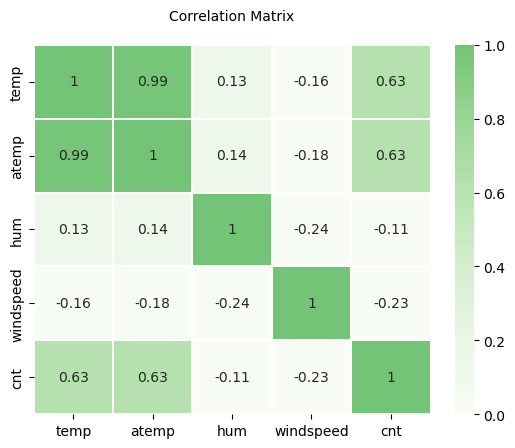

In [39]:
# Calculated correlation matrix for all quantitative variables
sns.heatmap(bike[quant_cols].corr(),  cmap='Greens', annot = True, center=True, linewidths=0.2, linecolor='white', vmin=0, vmax=1)
plt.title('Correlation Matrix\n', fontdict={'fontsize': 10, 'fontweight' : 5})
plt.show()

<font color = green> **Observations:**</font>  In the above correlation matrix, temp (temperature) and atemp (feeling temperature) variables are **almost perfectly correlated** (r= 0.99). We can safely remove one of them from further analysis however keeping it for now and **will be removed later while treating multi-colinearity**.

In [40]:
bike.shape

(729, 12)

<hr>

## <font color = blue> Univariate / Bivariate analysis of Quantitative variables using Pair-Plot </font>

- Pairplot can be used to perform univariate and bi-variate analysis across all the quantitative variables.<br>
- We can observed linear/non-linear relationships across predictors and along with target variable (bike demand)<br>

#### We have summarized all our observations after the charts

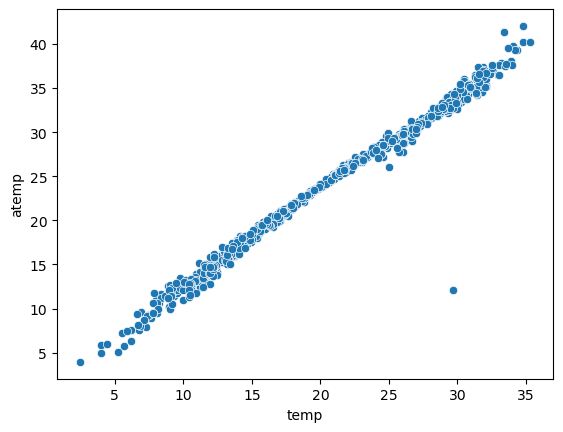

In [85]:
sns.scatterplot(x= bike.temp, y =bike.atemp)
plt.show()

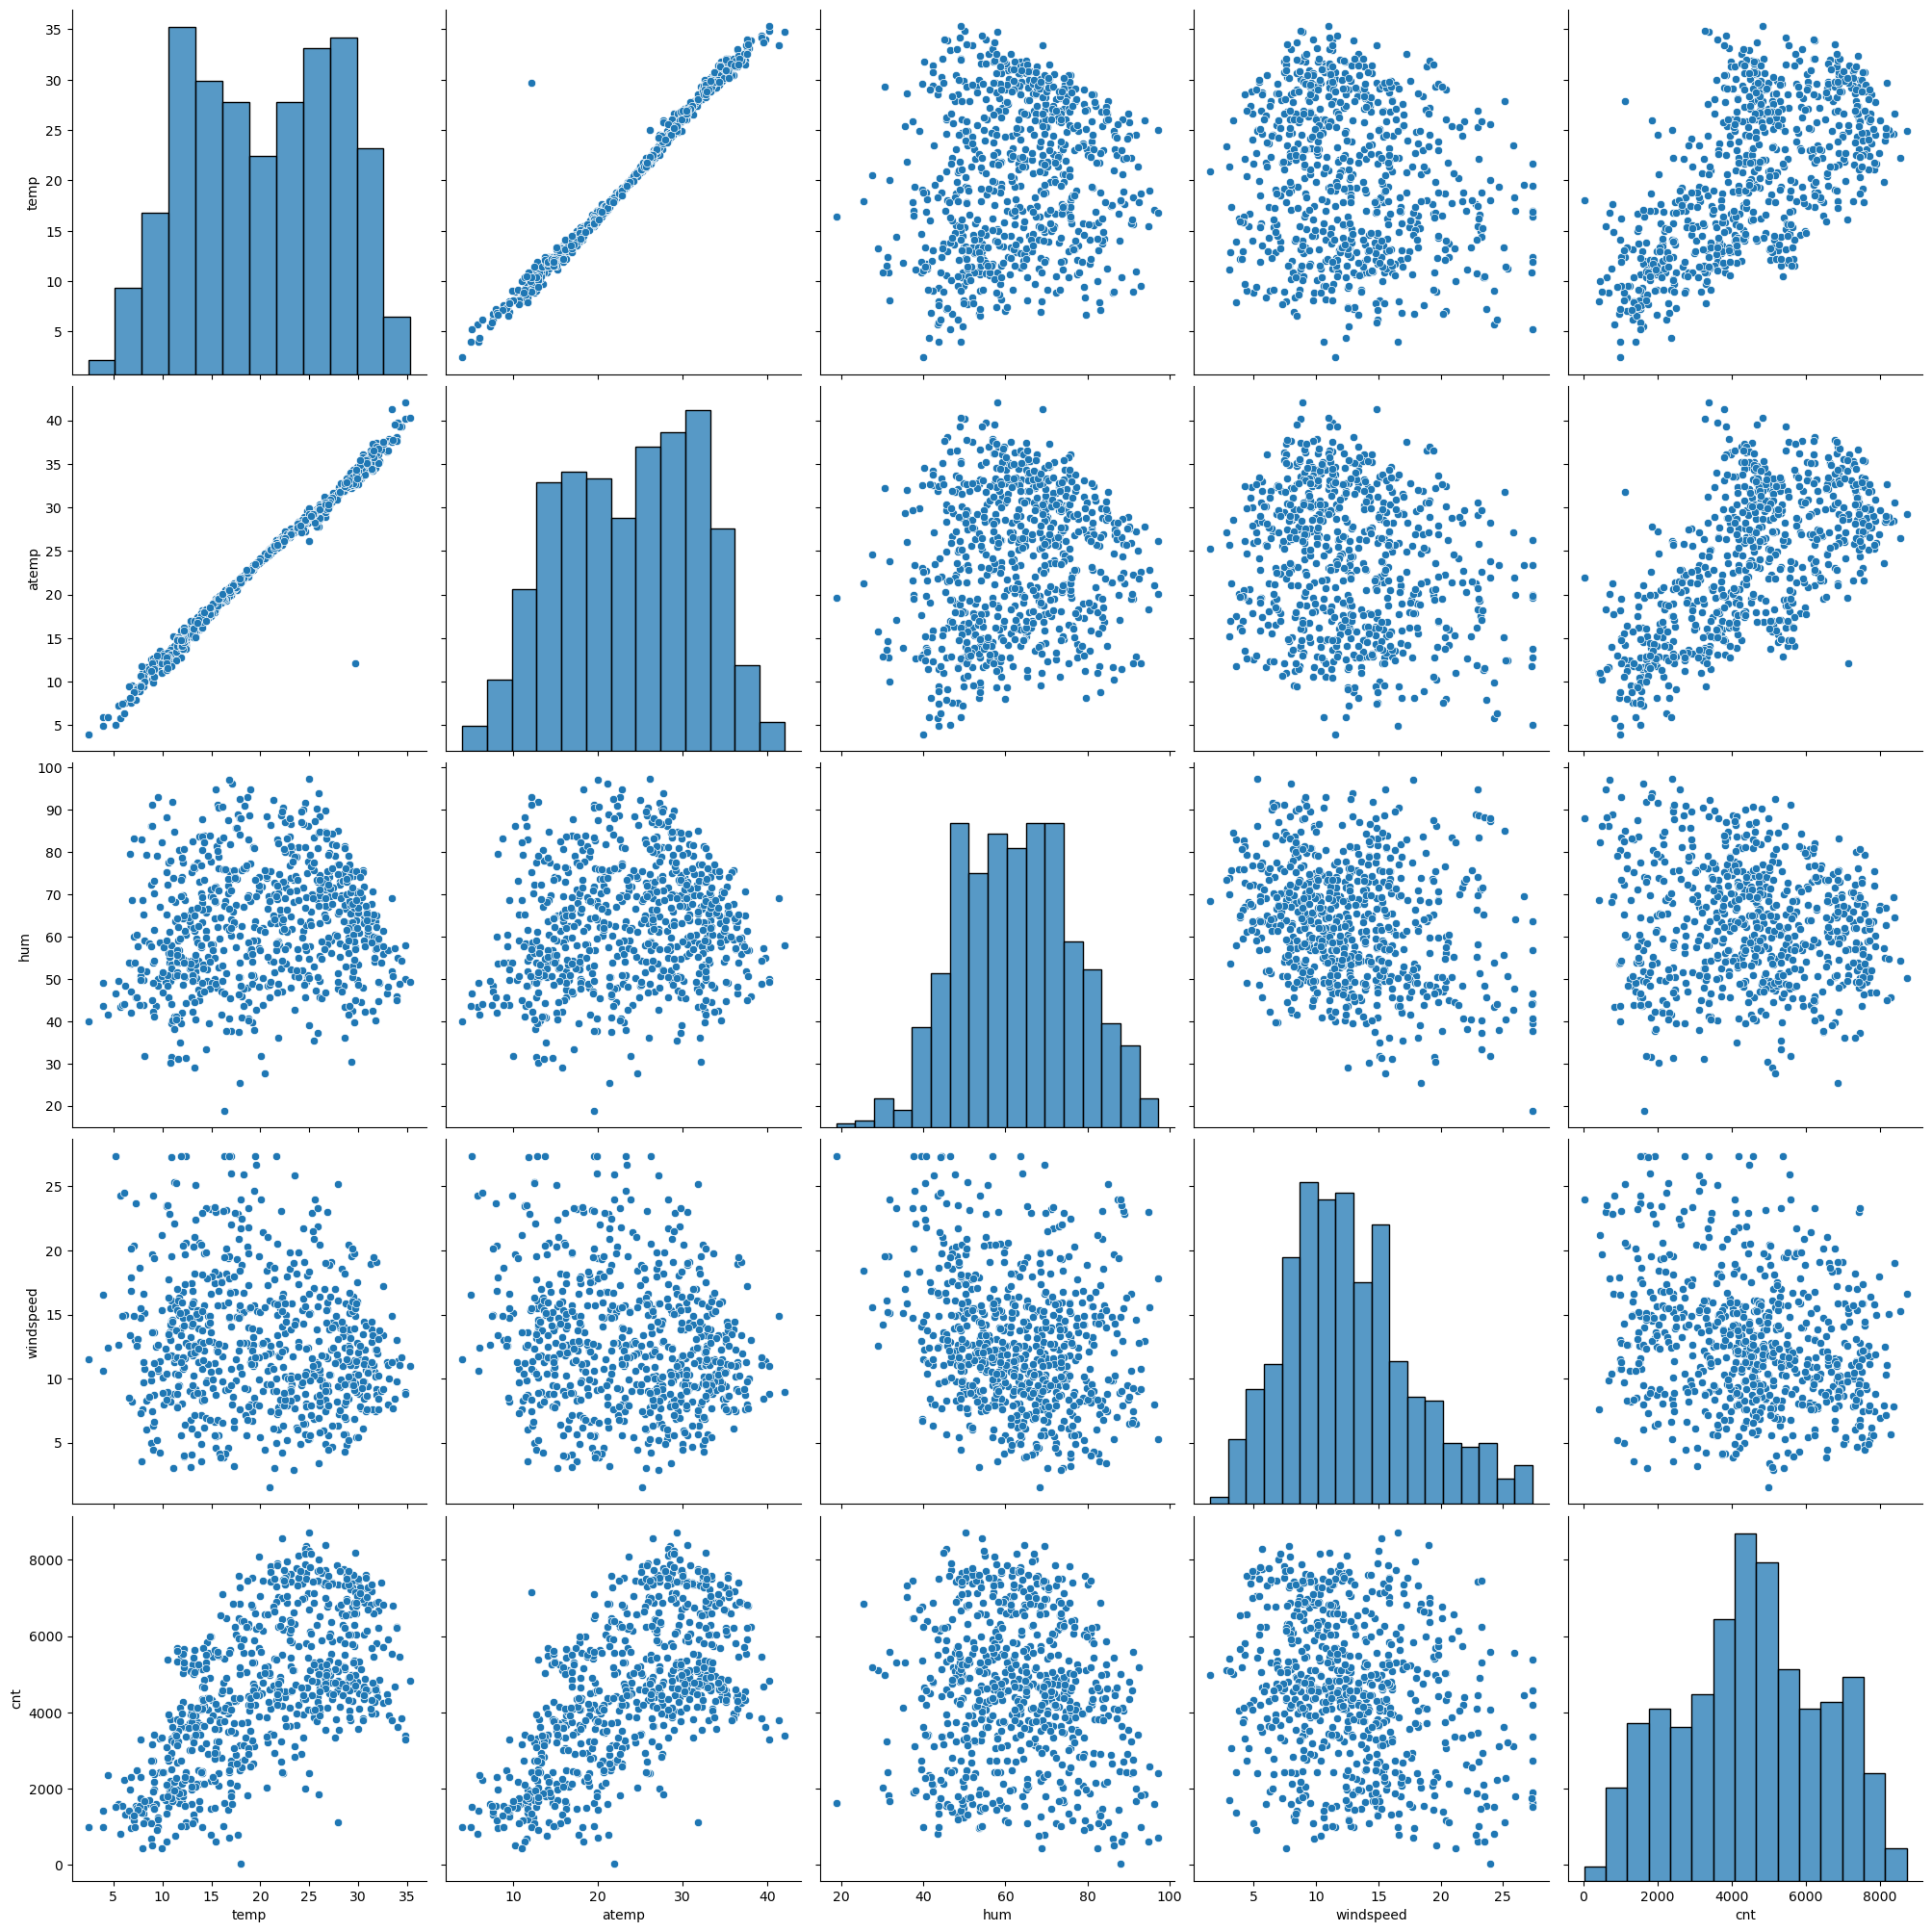

In [41]:
sns.pairplot(bike[quant_cols], size = np.pi*1.3)
plt.show()

<font color = green> **Observations:**</font>  Here we have provided summary of univariate and bivariate analysis conducted on Quantitative variables- <br>
1. A **very strong positive** linear relationship between temp (temperature) and atemp (feeling temperature) variables is observed using scatter plot. This was also confirmed by the pearson correlation calculated in the previous section.<br>
2. A **moderate positive** linear trend is observed between bike demand (cnt) and temp/atemp. <br>
3. A **Weak positive** trend observed between hum (humidity) and temp/atemp. <br>
4. A **Weak negative** trend observed between hum (humidity) and windspeed. <br>
5. A **Weak negative** trend observed between hum (humidity) and bike demand. <br>

<hr>

## <font color = blue> Univariate / Bivariate / Multivariate analysis of Qualitative variables </font>

- Pairplot (Scatter-plot) of Qualitative variables does not provide significant visual trends.<br>
- **Countplot** is used for univariate analysis.<br>
- **Boxplot** is used for bivariate analysis with Target variable.<br>
- **Barplot** is used for multivariate analysis with Target variable.<br>

#### We have summarized all our observations after the charts

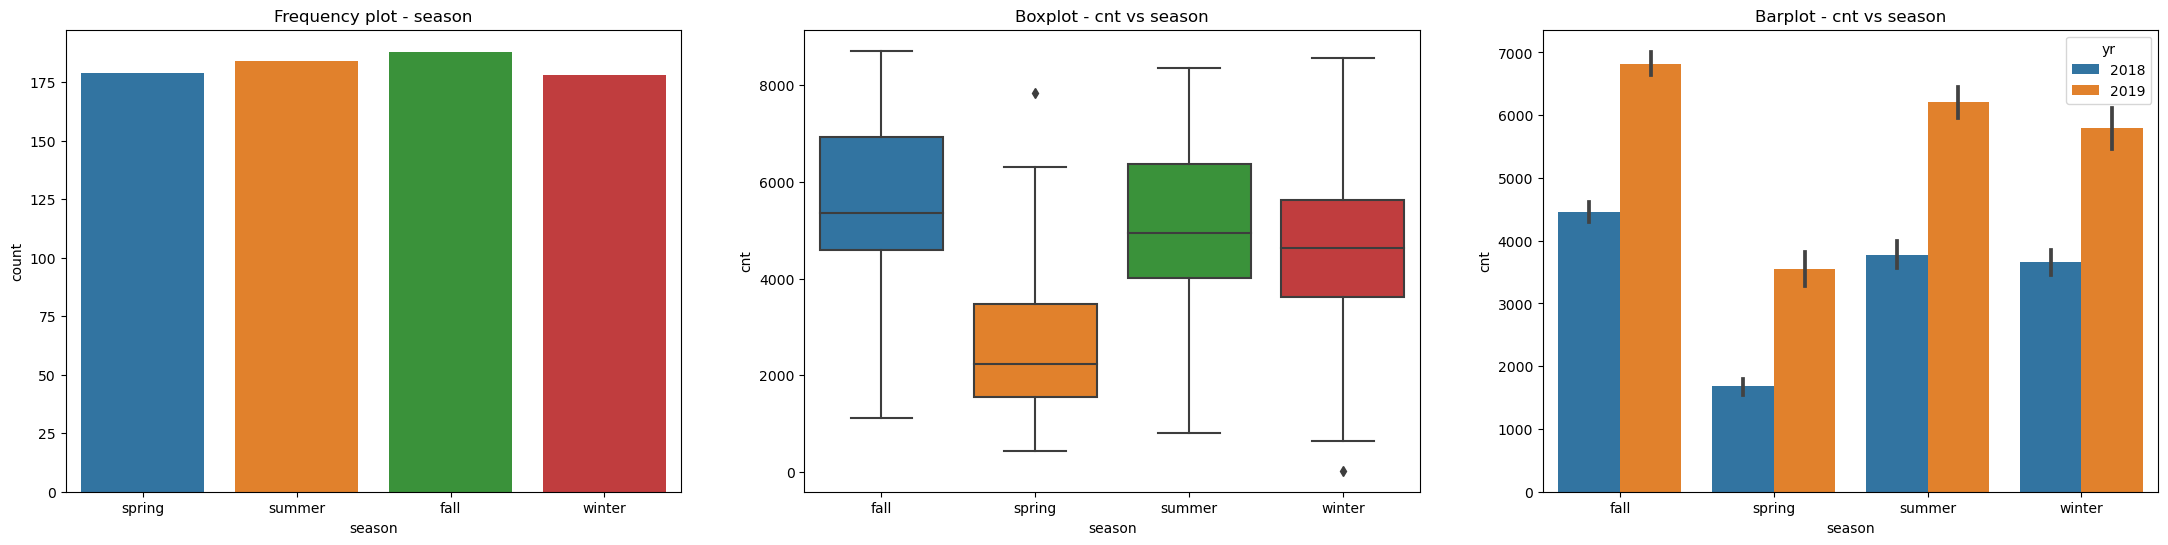

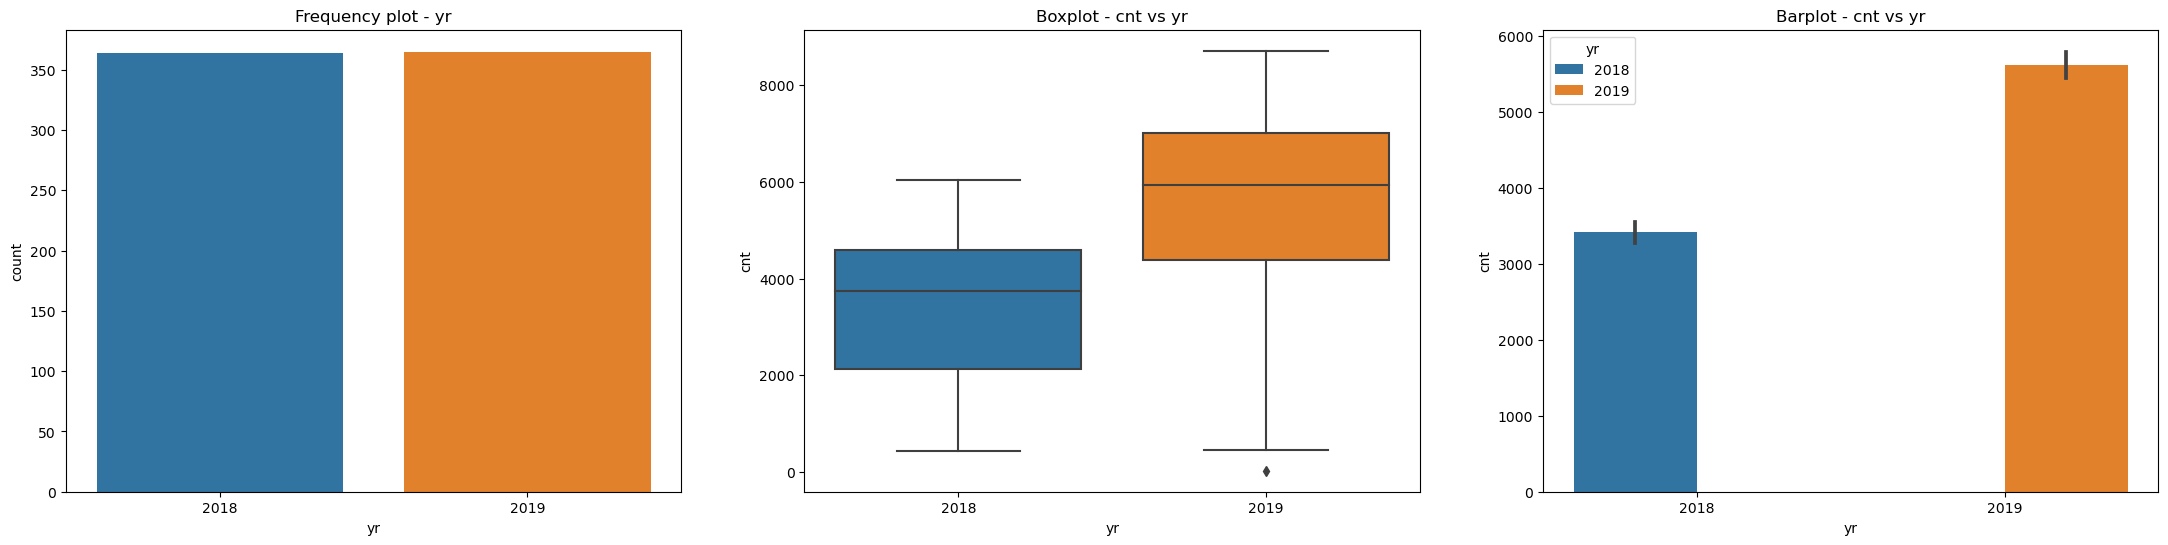

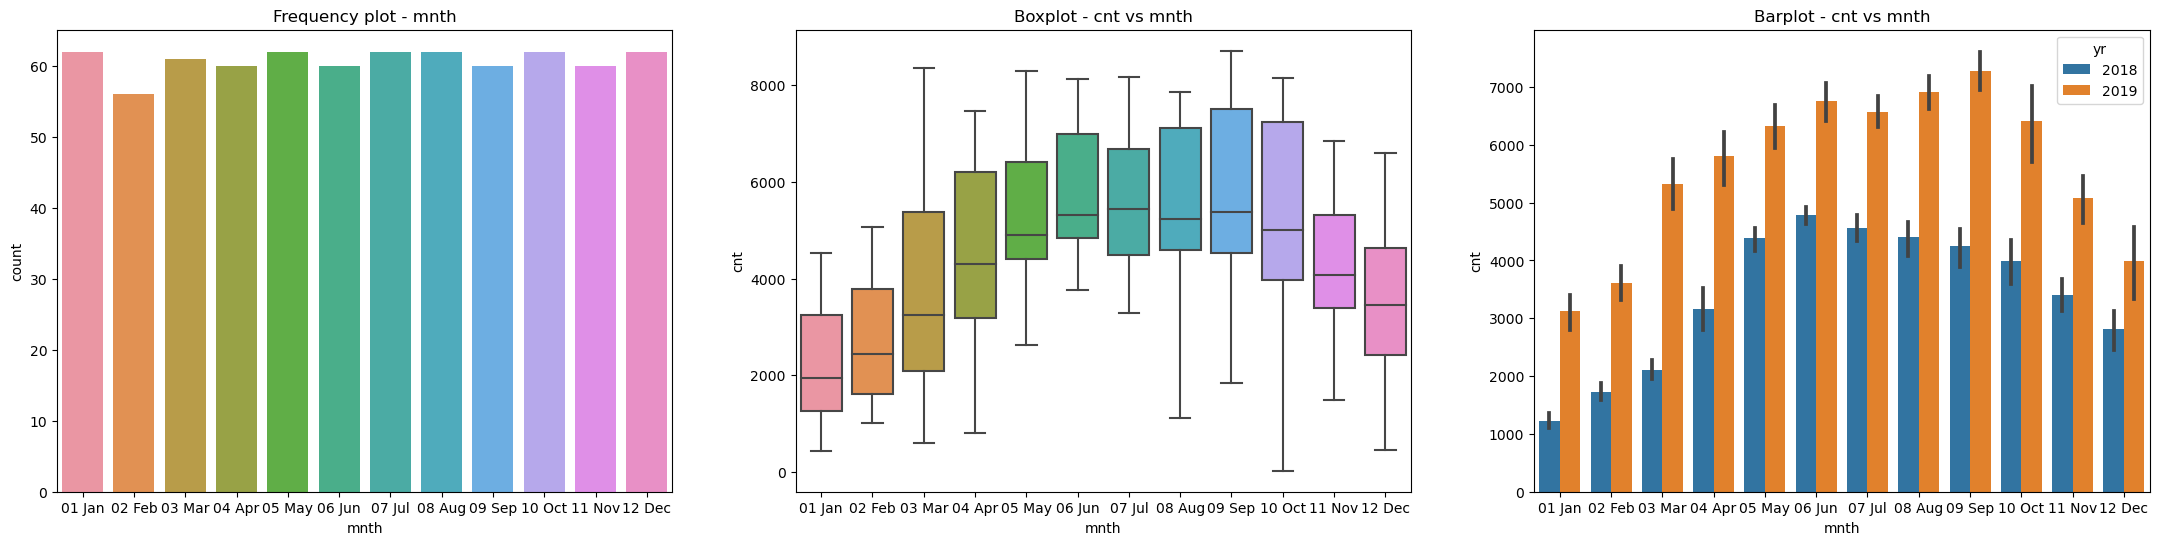

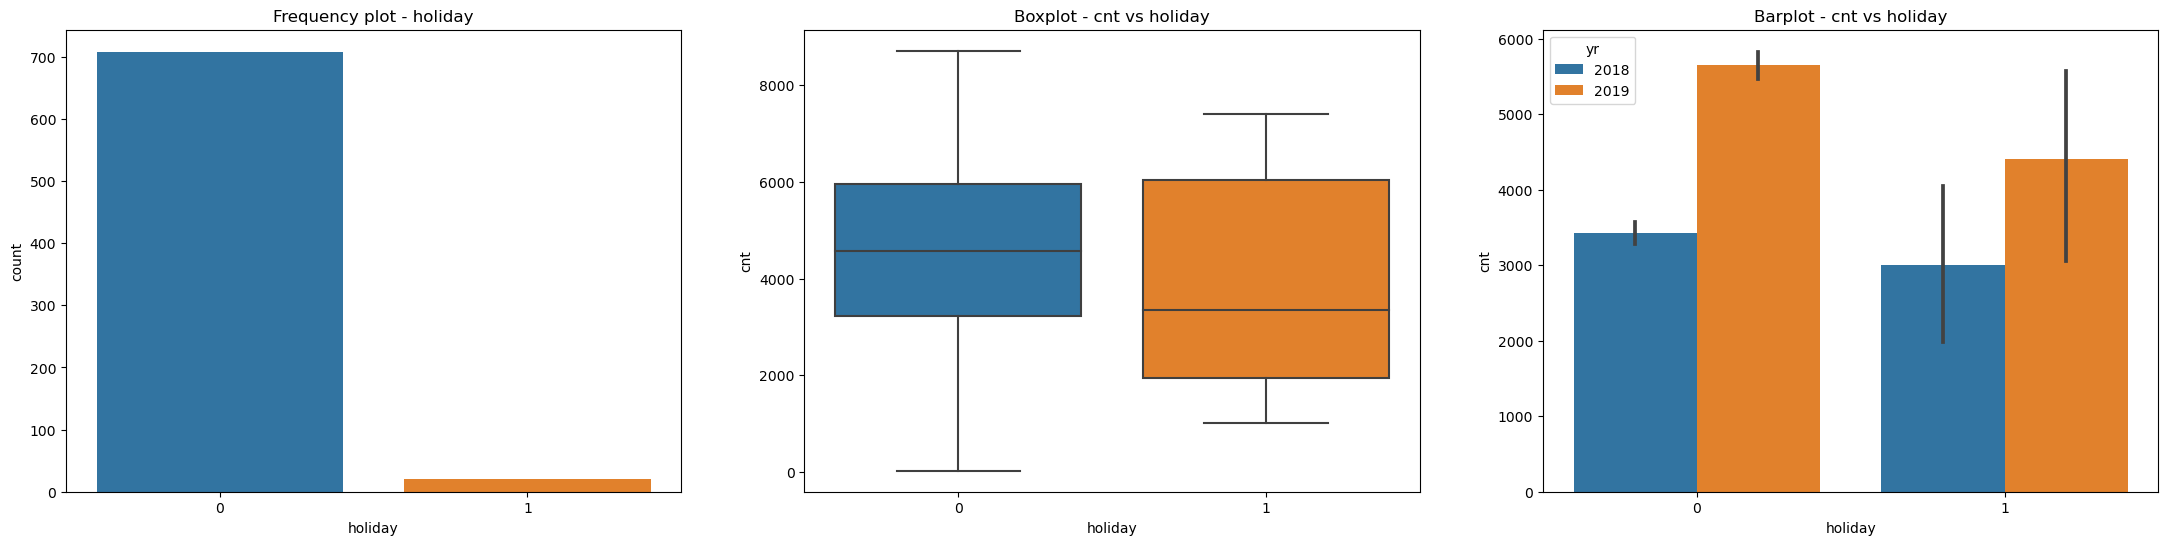

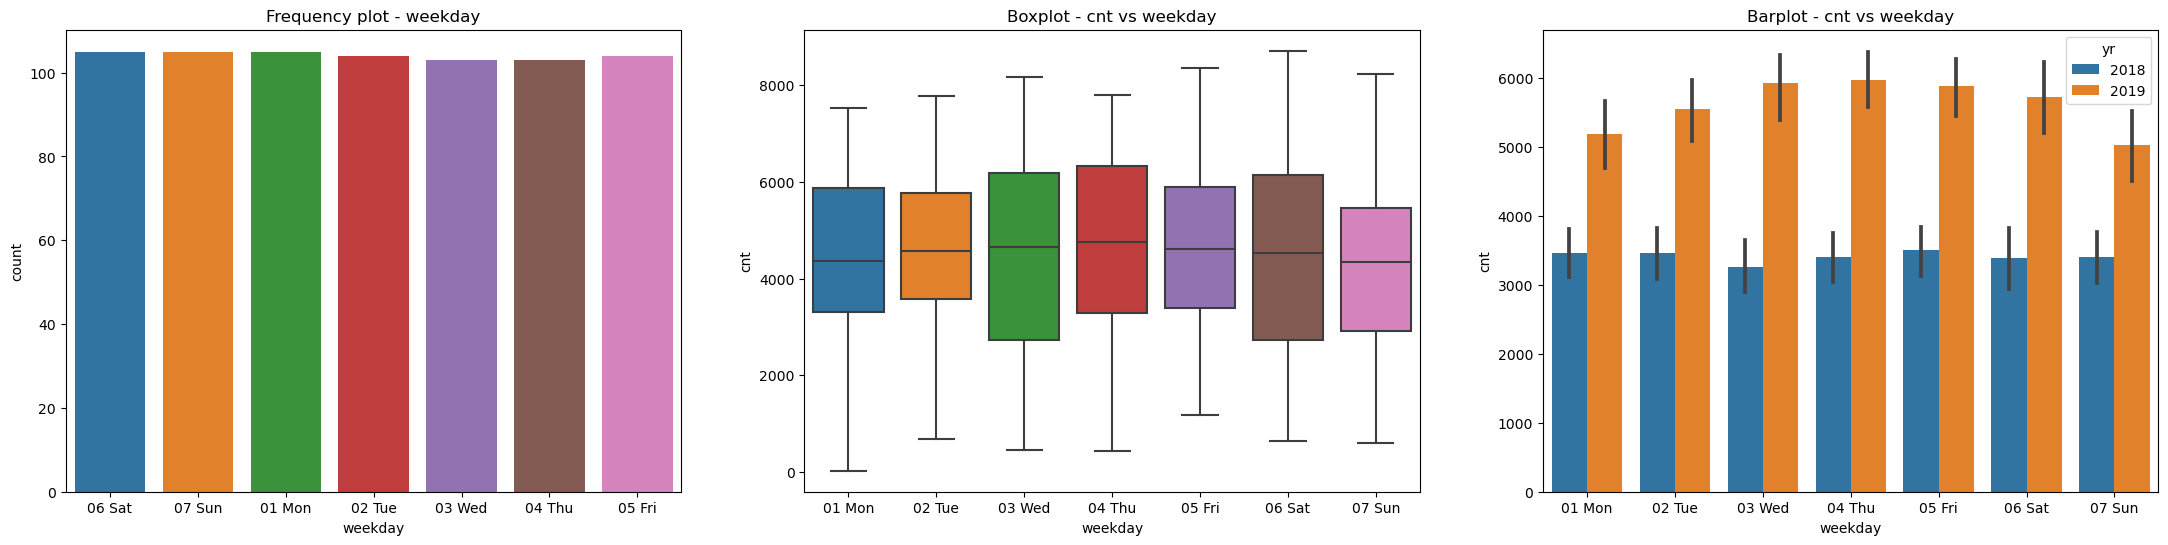

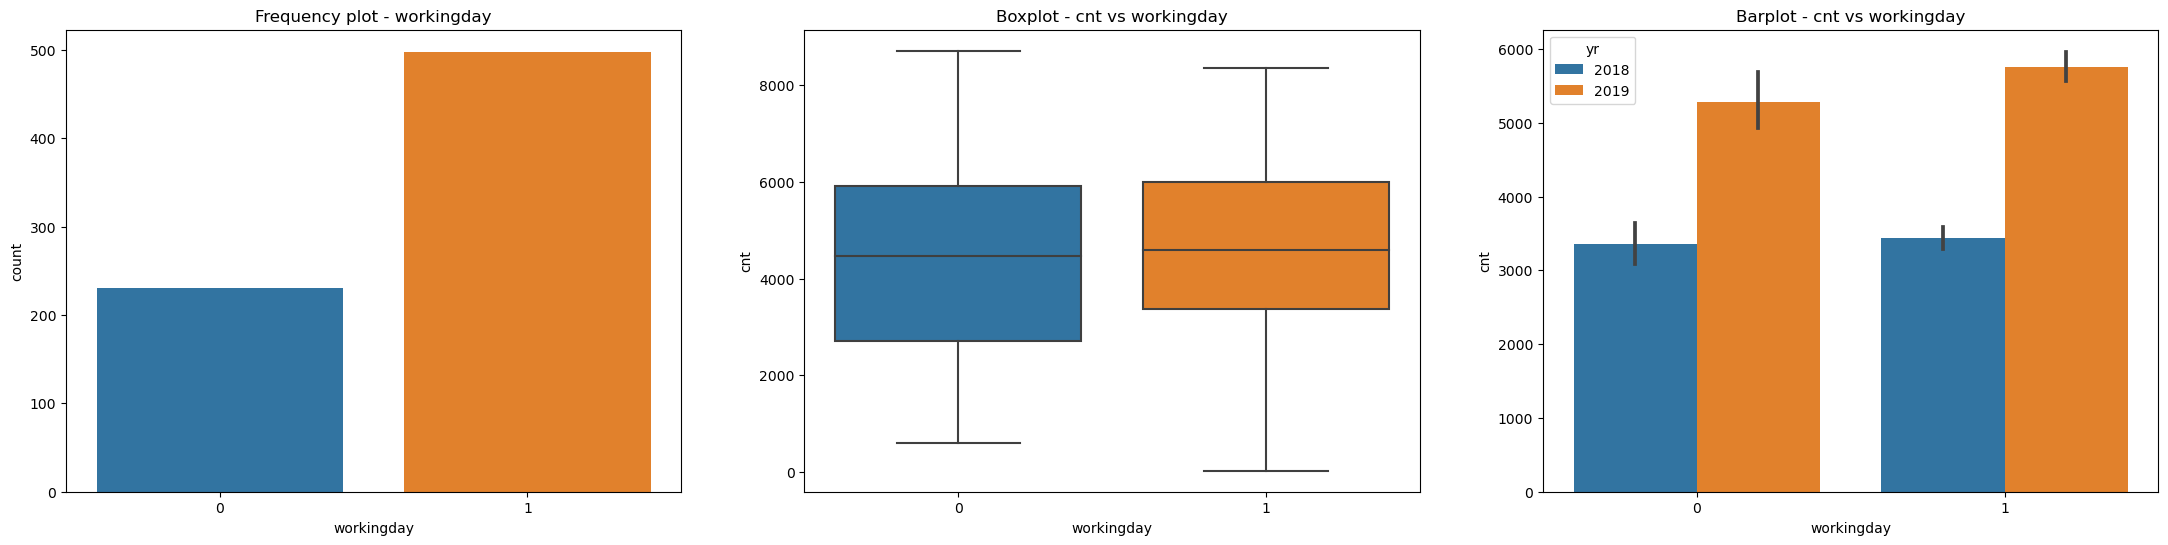

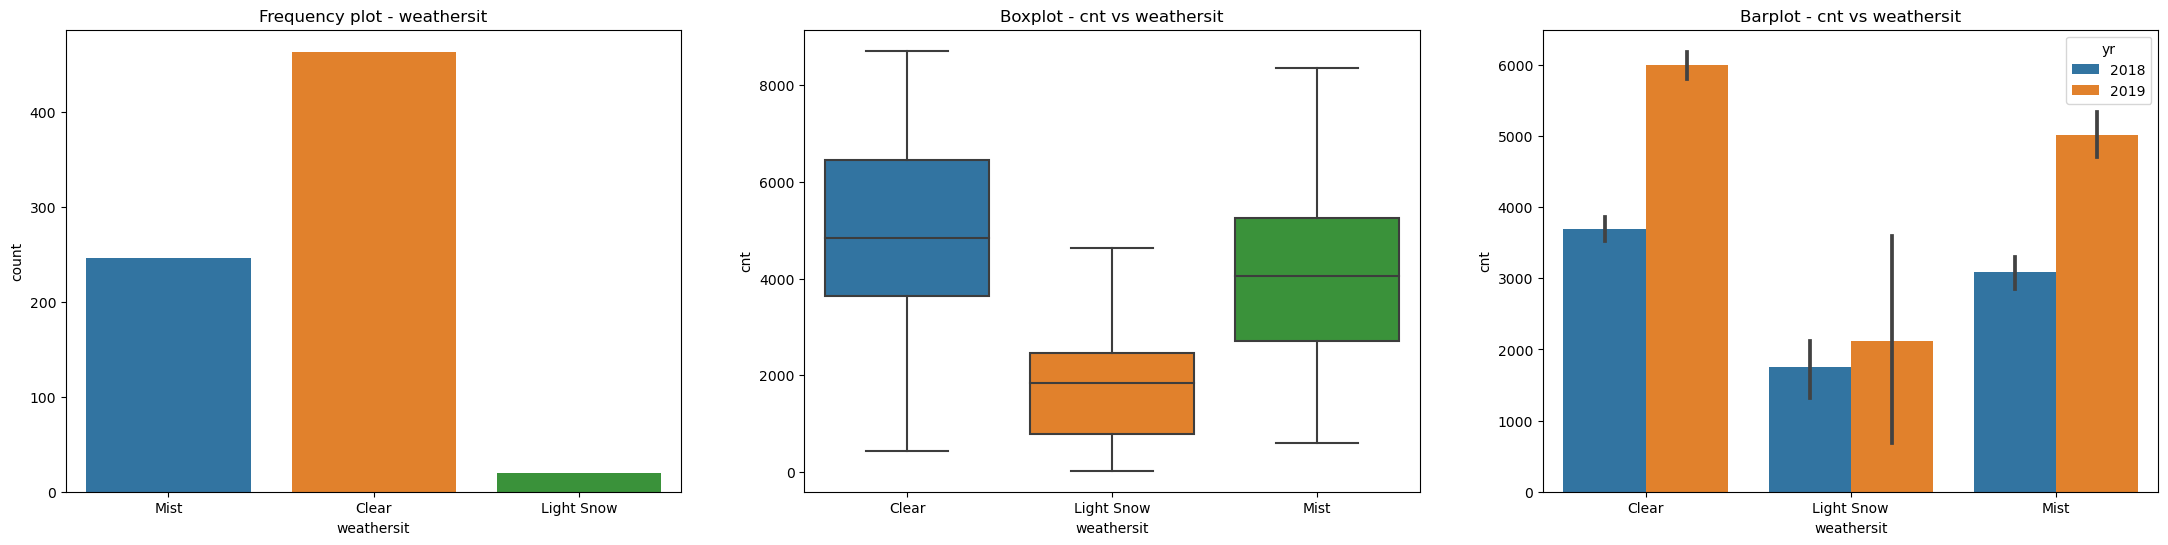

In [42]:
for x in qual_cols:
    plt.figure(figsize=(27,6))

    #creating Countplot
    plt.subplot(131)
    sns.countplot(x = bike[x])
    
    plt.title('Frequency plot - ' + x)
    
    #creating Boxplot
    plt.subplot(132)
    grade_ord = bike[x].unique()
    grade_ord.sort()
    sns.boxplot(y = bike['cnt'], x = bike[x], order = grade_ord)
    plt.title('Boxplot - cnt vs ' + x)
    
    #creating Barplot
    plt.subplot(133)
    sns.barplot(y = bike['cnt'], x = bike[x], hue= bike['yr'], order = grade_ord)
    plt.title('Barplot - cnt vs ' + x)
    plt.show()

<font color = green> **Observations:**</font>  Here we have provided summary of univariate, bivariate and multivariate analysis conducted on Qualitative variables- <br>
1. Count plot shows that all the data is equally distributed across years and months. During this period, weather was clear for majority of the time. <br>
2. From Barplot, it is evident that bike demand is increased in year 2019. <br>
3. Bike demand is lower if weather conditions are 'light snow/rain'. <br>
4. Weekday and holiday has shown weak trend on bike demand. <br>
5. Bike demand is higher in the month of May to September. After September, bike demand start decreasing which then start increasing january onwards. This was observed for both years.<br>
6. Spring season has shown the lowest bike demand and fall season has shown the highest bike demand for both years.<br>

<hr>

## <font color = blue> Creating Derived / Dummy Variables </font>

**Data driven variables-** <br>
- In order to perform regression modelling, **nominal categorical** variables/predictors can not be directly used nor these variables have order sequence. Therefore, dummy variables are created for these. <br>
- For nominal variable with n labels/categories, **n-1 Dummy variables** with values represented by 0 (non-exist) and 1 (exist) are sufficient to capture all the variable information. Therefore, keeping the nth variable in the data will only add **noise**.<br>
- `holiday` and `workingday` variables have binary 0 and 1 information. Therefore no dummy variable required

In [43]:
# Creating a list of all nominal categorical variables
nominal_cols = ['season', 'yr', 'mnth', 'weekday', 'weathersit']

Creation of All Dummy Variables- 

In [44]:
all_dummy_var = pd.get_dummies(bike[nominal_cols], drop_first = True)

Merging the dummy variables with the original data- 

In [45]:
bike = pd.merge(bike, all_dummy_var, left_index = True, right_index = True)

Dropping the original variables which are represented by Dummy variables- 

In [46]:
bike.drop(nominal_cols, axis=1, inplace= True)

In [47]:
bike.head(3)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_02 Feb,mnth_03 Mar,mnth_04 Apr,mnth_05 May,mnth_06 Jun,mnth_07 Jul,mnth_08 Aug,mnth_09 Sep,mnth_10 Oct,mnth_11 Nov,mnth_12 Dec,weekday_02 Tue,weekday_03 Wed,weekday_04 Thu,weekday_05 Fri,weekday_06 Sat,weekday_07 Sun,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
bike.shape

(729, 30)

<hr>

## <font color = blue> Split Training and Test datasets </font>

In order to create parametric regression model, we need to split the dataset into traning and test dataset.<br>
1. **Traning Dataset-** Model is build based on this dataset. It means model try to read the variance ($R^2$) of this data to get the best fit.<br>
2. **Test Dataset-** We need to vadidate the Model which is build based on traning dataset. Validation means that model is able to explain the variance ($R^2$) of the test dataset. Model should not be overfit to the traning data and should predict the variance of out-of-sample/test data to be a good model.<br>

Most common split of Traning and Test dataset is 70:30 which may vary with industry. We are using **70:30 split** for our modelling.

In [49]:
# 'random_state' agrument to keep same to get same training and test dataset. 
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 10)

<hr>

## <font color = blue> Rescaling Training and Test dataset </font>

1. Rescaling is performed in order to make the **beta coefficient comparable**. Rescaling has none or miniscule impact on the fitness of the model, nor it changes the p-value / significance of the predictors.
2. Without rescaling, strong and weak predictors can not be distinguished, based on the naked eye.
3. We have performed rescaling technique **standardization** (mean-0, sigma-1) on **all** the features of **traning** and **test** dataset **separately**. Because, we do not want model to learn anything from test dataset.
4. In order to rescale test data, we will use the scale of training data which ensures both the **train and test data are in the same scale**.
5. Rescaling of Dummy variables does not/marginal impact the model fit. Here, we have standardize these variables to make the data uniform for all variables.

In [50]:
scaler = StandardScaler()

# Here the scaler (fit) will learn the mean and std of train data
# Here the scaler (transform) will transform the train data based on the fit scaler learning
bike_train[list(bike_train.columns)] = scaler.fit_transform(bike_train[list(bike_train.columns)])

In [51]:
round(bike_train.describe(),2)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_02 Feb,mnth_03 Mar,mnth_04 Apr,mnth_05 May,mnth_06 Jun,mnth_07 Jul,mnth_08 Aug,mnth_09 Sep,mnth_10 Oct,mnth_11 Nov,mnth_12 Dec,weekday_02 Tue,weekday_03 Wed,weekday_04 Thu,weekday_05 Fri,weekday_06 Sat,weekday_07 Sun,weathersit_Light Snow,weathersit_Mist
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.0,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.0,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.17,-1.47,-2.20,-2.32,-3.12,-1.94,-2.08,-0.58,-0.59,-0.58,-1.02,-0.29,-0.30,-0.31,-0.3,-0.29,-0.28,-0.28,-0.32,-0.30,-0.31,-0.32,-0.42,-0.42,-0.41,-0.39,-0.42,-0.41,-0.19,-0.71
25%,-0.17,-1.47,-0.88,-0.85,-0.75,-0.71,-0.70,-0.58,-0.59,-0.58,-1.02,-0.29,-0.30,-0.31,-0.3,-0.29,-0.28,-0.28,-0.32,-0.30,-0.31,-0.32,-0.42,-0.42,-0.41,-0.39,-0.42,-0.41,-0.19,-0.71
50%,-0.17,0.68,0.01,0.07,-0.04,-0.13,0.03,-0.58,-0.59,-0.58,0.98,-0.29,-0.30,-0.31,-0.3,-0.29,-0.28,-0.28,-0.32,-0.30,-0.31,-0.32,-0.42,-0.42,-0.41,-0.39,-0.42,-0.41,-0.19,-0.71
75%,-0.17,0.68,0.88,0.81,0.72,0.57,0.79,1.15,1.68,1.72,0.98,-0.29,-0.30,-0.31,-0.3,-0.29,-0.28,-0.28,-0.32,-0.30,-0.31,-0.32,-0.42,-0.42,-0.41,-0.39,-0.42,-0.41,-0.19,1.41
max,5.95,0.68,2.07,2.33,2.39,2.83,2.15,1.73,1.68,1.72,0.98,3.48,3.34,3.18,3.3,3.48,3.52,3.52,3.14,3.38,3.18,3.14,2.37,2.35,2.45,2.59,2.39,2.47,5.23,1.41


In [52]:
# Use of transform scaler on test dataset based on fit scaler of traning data
# This ensures both the train and test data are in the same scale
bike_test[list(bike_test.columns)] = scaler.transform(bike_test[list(bike_test.columns)])

In [53]:
round(bike_test.describe(),2)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_02 Feb,mnth_03 Mar,mnth_04 Apr,mnth_05 May,mnth_06 Jun,mnth_07 Jul,mnth_08 Aug,mnth_09 Sep,mnth_10 Oct,mnth_11 Nov,mnth_12 Dec,weekday_02 Tue,weekday_03 Wed,weekday_04 Thu,weekday_05 Fri,weekday_06 Sat,weekday_07 Sun,weathersit_Light Snow,weathersit_Mist
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.03,0.01,0.09,0.08,-0.07,-0.04,0.01,-0.04,-0.06,-0.07,-0.05,0.00,0.02,-0.09,0.01,0.07,0.13,0.13,-0.11,0.06,-0.09,-0.08,-0.08,-0.11,-0.02,0.13,-0.05,0.03,-0.14,0.03
std,1.08,1.00,1.08,1.08,0.95,1.00,0.95,0.98,0.96,0.96,1.00,1.01,1.03,0.86,1.02,1.11,1.19,1.19,0.82,1.09,0.86,0.88,0.92,0.89,0.98,1.13,0.95,1.03,0.52,1.01
min,-0.17,-1.47,-2.41,-2.46,-2.40,-2.20,-2.29,-0.58,-0.59,-0.58,-1.02,-0.29,-0.30,-0.31,-0.30,-0.29,-0.28,-0.28,-0.32,-0.30,-0.31,-0.32,-0.42,-0.42,-0.41,-0.39,-0.42,-0.41,-0.19,-0.71
25%,-0.17,-1.47,-0.84,-0.82,-0.81,-0.79,-0.57,-0.58,-0.59,-0.58,-1.02,-0.29,-0.30,-0.31,-0.30,-0.29,-0.28,-0.28,-0.32,-0.30,-0.31,-0.32,-0.42,-0.42,-0.41,-0.39,-0.42,-0.41,-0.19,-0.71
50%,-0.17,0.68,0.21,0.27,-0.03,-0.11,0.02,-0.58,-0.59,-0.58,-1.02,-0.29,-0.30,-0.31,-0.30,-0.29,-0.28,-0.28,-0.32,-0.30,-0.31,-0.32,-0.42,-0.42,-0.41,-0.39,-0.42,-0.41,-0.19,-0.71
75%,-0.17,0.68,1.08,1.04,0.61,0.52,0.63,-0.58,-0.59,-0.58,0.98,-0.29,-0.30,-0.31,-0.30,-0.29,-0.28,-0.28,-0.32,-0.30,-0.31,-0.32,-0.42,-0.42,-0.41,-0.39,-0.42,-0.41,-0.19,1.41
max,5.95,0.68,1.90,2.04,2.22,2.83,1.87,1.73,1.68,1.72,0.98,3.48,3.34,3.18,3.30,3.48,3.52,3.52,3.14,3.38,3.18,3.14,2.37,2.35,2.45,2.59,2.39,2.47,5.23,1.41


<hr>

## <font color = blue> Dividing into X (Predictors) and Y (Response) sets for the model building </font>

In [54]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [55]:
y_test = bike_test.pop('cnt')
X_test = bike_test

<hr>

## <font color = blue> Building Linear Regression Model </font>

Equation of linear regression<br>
$y = c + b_1x_1 + b_2x_2 + ... + b_nx_n$

-  $y$ is the response / target variable
-  $x_1 - x_n$ is the independent / predictor variable
-  $c$ is the intercept
-  $b_1$ is the beta coefficient of $1^{st}$ feature
-  $b_n$ is the beta coefficient of $n^{th}$ feature<br>

<hr>

## <font color = blue> Recursive Feature Elimination (RFE)</font>

RFE is an **automatic feature selection method** to identify key features of the dataset. The process involves developing a model with the remaining features after repeatedly removing the least significant parts until the desired number of features is obtained.<br><br>
RFE algorithm works in the following steps: (source: Analytics Vidhya)<br> 
1. Rank the importance of all features using the chosen RFE machine learning algorithm.
2. Eliminate the least important feature.
3. Build a model using the remaining features.
4. Repeat steps 1-3 until the desired number of features is reached.<br>

For our analysis, We have selected **upto 12 most significant** variables by RFE.

In [56]:
# Creating Linear Regression Object
Model_all = LinearRegression()

# Creating linear Regression Model based on all the predictors
Model_all.fit(X_train, y_train)

rfe = RFE(estimator = Model_all, n_features_to_select =12)
rfe = rfe.fit(X_train, y_train)

In [57]:
# Predictors with RFE ranking 1 are the 12 most significant variables selected by RFE method
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 3),
 ('season_spring', True, 1),
 ('season_summer', False, 16),
 ('season_winter', False, 5),
 ('yr_2019', True, 1),
 ('mnth_02 Feb', False, 15),
 ('mnth_03 Mar', False, 6),
 ('mnth_04 Apr', False, 9),
 ('mnth_05 May', False, 4),
 ('mnth_06 Jun', False, 8),
 ('mnth_07 Jul', False, 18),
 ('mnth_08 Aug', False, 7),
 ('mnth_09 Sep', True, 1),
 ('mnth_10 Oct', True, 1),
 ('mnth_11 Nov', False, 12),
 ('mnth_12 Dec', False, 11),
 ('weekday_02 Tue', False, 17),
 ('weekday_03 Wed', False, 10),
 ('weekday_04 Thu', False, 14),
 ('weekday_05 Fri', False, 13),
 ('weekday_06 Sat', True, 1),
 ('weekday_07 Sun', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

**Creating X_train dataframe with RFE selected / choosen variables-**

In [58]:
RFE_choosen_col = X_train.columns[rfe.support_]
X_train_model1 = X_train[RFE_choosen_col]

In [59]:
X_train_model1.head(3)

,holiday,workingday,temp,atemp,season_spring,yr_2019,mnth_09 Sep,mnth_10 Oct,weekday_06 Sat,weekday_07 Sun,weathersit_Light Snow,weathersit_Mist
instant,,,,,,,,,,,,
325,-0.168005,0.682288,-0.242882,-0.162315,-0.578860,-1.015811,-0.318609,-0.295669,-0.418468,-0.405442,5.228129,-0.707107
74,-0.168005,0.682288,-0.970144,-0.959772,1.727534,-1.015811,-0.318609,-0.295669,-0.418468,-0.405442,-0.191273,1.414214
512,-0.168005,-1.465656,1.112604,1.071813,-0.578860,0.984435,-0.318609,-0.295669,-0.418468,2.466441,-0.191273,-0.707107


<hr>

## <font color = blue> Model 1 - RFE Selected Variables </font>

#### Addition of Constant Variable - <br>
By default, the statsmodels library fits a line on the dataset which passes through the origin (y = 0 and X = 0). But in order to have an intercept, we manually need to add constant (value = 1) using **add_constant** attribute of statsmodels.

In [60]:
X_train_model1 = sm.add_constant(X_train_model1)

#### Fit a Regression line using **OLS** (Ordinary Least Squares) attribute of statsmodels

In [61]:
model1 = sm.OLS(y_train, X_train_model1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          7.25e-186
Time:                        21:40:32   Log-Likelihood:                -263.68
No. Observations:                 510   AIC:                             553.4
Df Residuals:                     497   BIC:                             608.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.908e-

<font color = green> **Observations:**</font>  **Model1 Summary** results are explained here-<br>
- **R-squared:** This measures the variation of a regression model. R-squared either increases or remains the same when new predictors are added to the model.
- **Adjusted R-squared:** This takes into account the number of independent variables used for predicting the target variable. In doing so, we can determine whether adding new variables to the model actually increases the model fit. If it does not increase the model fit then its value will decrease. Therefore we have used **Adjusted R-squared to evaluate the model fit**.
- For our analysis, we have used **5% significance** level to reject the **null hypothesis (beta coefficient = 0)** of beta estimators. If the p-value against a beta coefficient is less than 0.05 then we have rejected the null hypothesis and considered it significant.
- **Model overall fitness** is checked by the **p-value of F-statistic**. If the p-value of F-statistic is less than 0.05 then we have assumed it be a good fit.
<br><br><br>
- **Adjusted R-squared:** It is 0.831 which mean model 1 is a **strong fit** to the traning data.
- **Overall Fitness:** Model is a strong fit which is also explained by adjusted R-squared.
- **Beta Significant:** For few variables, p-value is greater than 0.05 thus beta is not significant for these variables. However model 1 has detected multicolinearity. And multicolinearity can make the p-value or beta parameters insignificant. Thus treating the multicolinearity in the below section.
<br>

- **Conclusion:** We will check for multicolinearity. Will make further decison based it.

<hr>

## <font color = blue>Treating Multicollinearity using VIF </font>

In the above model1 summary, **multicollinearity has been detected**. Multicollinearity exists when there is a correlation between multiple independent predictors in a multiple regression model. Therefore to treat multicollinearity, we will calculate variance inflation factor (VIF).<br><br> VIF measures the amount of multicollinearity by quantifying the correlation of one indipendent predictor with all other independent predictors. It is caldulated as:

### $ VIF_i = \frac{1}{1 - R_i^2} $
<br>
Here $R_i^2$ is the variance explained of $i^{th}$ predictor by other predictors

#### <font color = blue> Calculating VIF on Model 1 </font >

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model1.columns
vif['VIF'] = [variance_inflation_factor(X_train_model1.values, i) for i in range(X_train_model1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_06 Sat,inf
10,weekday_07 Sun,inf
4,atemp,136.86
3,temp,134.92
5,season_spring,1.74
7,mnth_09 Sep,1.10
8,mnth_10 Oct,1.09
11,weathersit_Light Snow,1.09


<font color = green> **Observations:**</font>  VIF results of Model 1 are explained here-<br>
- Generally, across industries, a predictor having VIF value greater than 5 are considered **highly correlated** with other predictors.
- We have observed 4 predictors having **infinite VIF**. Infinite VIF can only happen in case of $R^2 = 1$. $R^2$ value 1 means that there is a **perfect correlation** (causation) and each of these four predictors can be totally explained by other predictors.
- Out of these four predictors, we have choosen **holiday** to be removed first and recreate the model.
- These **four predictors can not be removed in one go** because removing of one predictor (holiday) may change VIF value of other infinite predictors.

## <font color = blue> Model 2 - Dropping 'holiday' and recreating the model </font>

In [63]:
X_train_model2 = X_train_model1.drop('holiday', axis= 1)

In [64]:
model2 = sm.OLS(y_train, X_train_model2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.42e-187
Time:                        21:40:32   Log-Likelihood:                -263.62
No. Observations:                 510   AIC:                             551.2
Df Residuals:                     498   BIC:                             602.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.908e-

<font color = green> **Observations:**</font>  **Model2 Summary** results are explained here-<br>
- **Adjusted R-squared:** It is 0.832 which has improved from model1. This is a **strong fit** to the traning data.
- **Overall Fitness:** Model is a strong fit which is also explained by adjusted R-squared.
- **Beta Significant:** After treating multicolinearity, we have observed that all the beta parameters have become significant.
<br>

- **Conclusion:** We will again check for multicolinearity. Will make further decison based it.

#### <font color = blue> Calculating VIF on Model 2 </font >

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model2.columns
vif['VIF'] = [variance_inflation_factor(X_train_model2.values, i) for i in range(X_train_model2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,137.00
2,temp,135.39
1,workingday,8.29
8,weekday_06 Sat,5.50
9,weekday_07 Sun,5.30
4,season_spring,1.74
6,mnth_09 Sep,1.10
7,mnth_10 Oct,1.09
10,weathersit_Light Snow,1.09
11,weathersit_Mist,1.04


<font color = green> **Observations:**</font>  VIF results of Model 2 are explained here-<br>
- Generally, across industries, a predictor having VIF value greater than 5 are considered **highly correlated** with other predictors.
- `atemp` predictor has highest VIF with value of 137. Therefore removing the same in next model. 

<hr>

## <font color = blue> Model 3 - Dropping 'atemp' and recreating the model </font>

In [66]:
X_train_model3 = X_train_model2.drop('atemp', axis= 1)

In [67]:
model3 = sm.OLS(y_train, X_train_model3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          3.28e-185
Time:                        21:40:32   Log-Likelihood:                -270.90
No. Observations:                 510   AIC:                             563.8
Df Residuals:                     499   BIC:                             610.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.908e-

<font color = green> **Observations:**</font>  **Model 3 Summary** results are explained here-<br>
- **Adjusted R-squared:** It is 0.827 which has marginally decrease from model 2. This is still a **strong fit** to the traning data. Though there is minor decrease of Adjusted R-squared, it has more generalized the model fit. This **trade off**, we have accepted.
- **Overall Fitness:** Model is a strong fit which is also explained by adjusted R-squared.
- **Beta Significant:** All the beta parameters are significant.
<br>

- **Conclusion:** We will again check for multicolinearity. Will make further decison based it.

#### <font color = blue> Calculating VIF on Model 3 </font >

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model3.columns
vif['VIF'] = [variance_inflation_factor(X_train_model3.values, i) for i in range(X_train_model3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,8.27
7,weekday_06 Sat,5.49
8,weekday_07 Sun,5.29
2,temp,1.72
3,season_spring,1.71
5,mnth_09 Sep,1.09
6,mnth_10 Oct,1.08
9,weathersit_Light Snow,1.07
10,weathersit_Mist,1.04
4,yr_2019,1.02


<font color = green> **Observations:**</font>  VIF results of Model 3 are explained here-<br>
- Generally, across industries, a predictor having VIF value greater than 5 are considered **highly correlated** with other predictors.
- There are three predictors which have VIF greater than 5, however their p-value is almost zero which make them significant to model fit. Here the **trade-off between p-value and VIF** is observed.
- Here we have choosen `weekday_07 Sun` predictor to exclude from next model because out of these three predictors, this predictor has the highest p-value.  

<hr>

## <font color = blue> Model 4 - Dropping 'weekday_07 Sun' and recreating the model </font>

In [69]:
X_train_model4 = X_train_model3.drop('weekday_07 Sun', axis= 1)

In [70]:
model4 = sm.OLS(y_train, X_train_model4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.33e-184
Time:                        21:40:32   Log-Likelihood:                -275.23
No. Observations:                 510   AIC:                             570.5
Df Residuals:                     500   BIC:                             612.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.908e-

<font color = green> **Observations:**</font>  **Model 4 Summary** results are explained here-<br>
- **Adjusted R-squared:** It is 0.825 which has marginally decrease from model 3. This is still a **strong fit** to the traning data. Though there is minor decrease of Adjusted R-squared, it has more generalized the model fit. This **trade off**, we have accepted.
- **Overall Fitness:** Model is a strong fit which is also explained by adjusted R-squared.
- **Beta Significant:** All the beta parameters are significant.
<br>

- **Conclusion:** We will again check for multicolinearity. Will make further decison based it.

#### <font color = blue> Calculating VIF on Model 4 </font >

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model4.columns
vif['VIF'] = [variance_inflation_factor(X_train_model4.values, i) for i in range(X_train_model4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,1.72
3,season_spring,1.71
1,workingday,1.62
7,weekday_06 Sat,1.61
5,mnth_09 Sep,1.09
6,mnth_10 Oct,1.08
8,weathersit_Light Snow,1.07
9,weathersit_Mist,1.04
4,yr_2019,1.02
0,const,1.00


<font color = green> **Observations:**</font>  VIF results of Model 4 are explained here-<br>
- Generally, across industries, a predictor having VIF value greater than 5 are considered **highly correlated** with other predictors.

<font color = Red> **Conclusion:**</font>
- All VIF values are less than 2 and this model is strong fit on the traning data. **Therefore we have accepted Model 4 as Final model.**

<hr>

## <font color = blue> Residual Analysis on Final Model </font>

### Assumptions of Regression Analysis-

**Already Performed/ validated-**<br>
1. **Linearity:** There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s).
>Final model has Adjusted R square value of more than 0.8 which is strong linear fit. Additionally, Bi-variate chart also confirmed the linear relationship between bike demand (cnt) and independed predictors. 
2. **No multicollinearity:** The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
>Final model does not have VIF greater than 2 for any predictor thus multicolinearity does not exist in the final model.

<br>**To be Performed in Residual Analysis-**<br>
1. **Homoscedasticity:** The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
2. **Normality:** The error terms must be normally distributed.

#### Check for Normality-

In [72]:
y_train_pred = model4.predict(X_train_model4)
error = (y_train - y_train_pred)

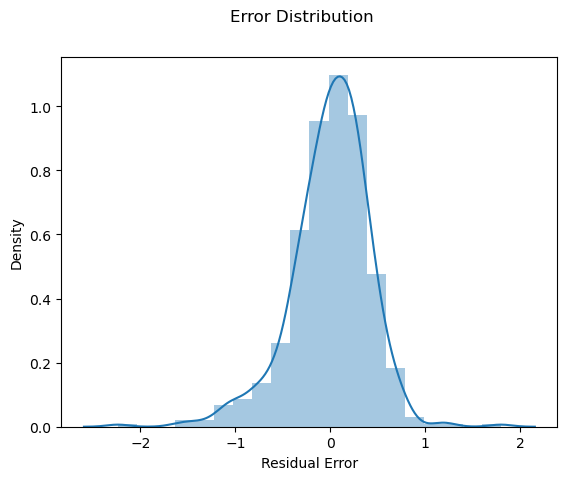

In [73]:
fig = plt.figure()
sns.distplot(error, bins = 20)
fig.suptitle('Error Distribution')   # Plot heading 
plt.xlabel('Residual Error')         # X-label
plt.show()

<font color = green> **Observations:**</font>  From the above chart we can confirm that residual errors are normally distributed.

#### Check for Homoscedasticity-

In [74]:
# Making the list of final predictors
Final_predictors = list(X_train_model4.columns)
Final_predictors.remove('const')

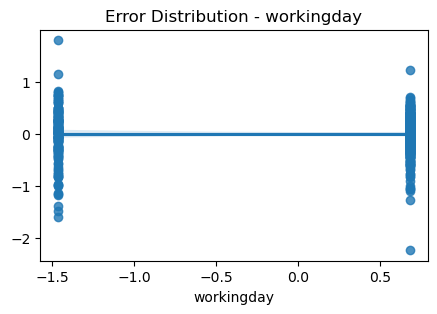

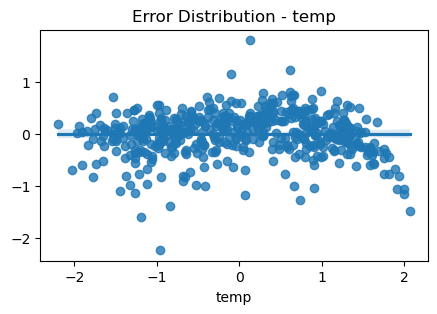

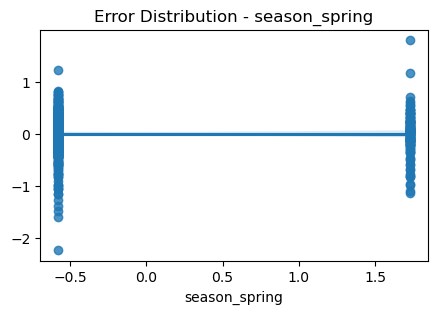

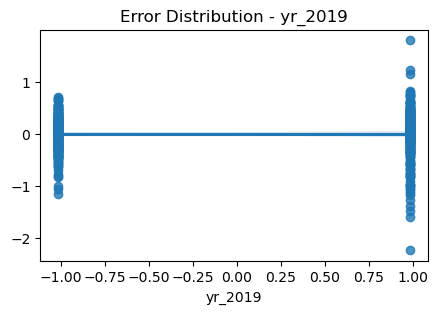

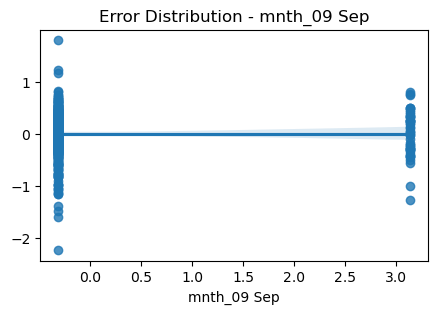

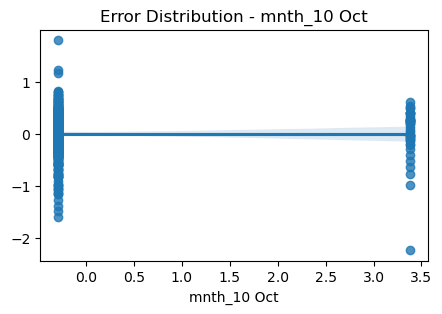

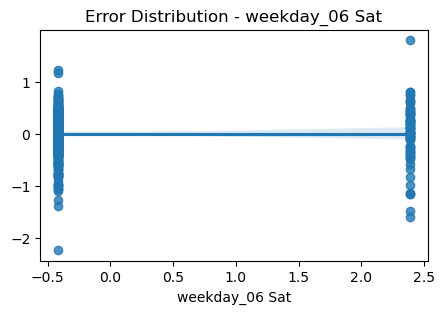

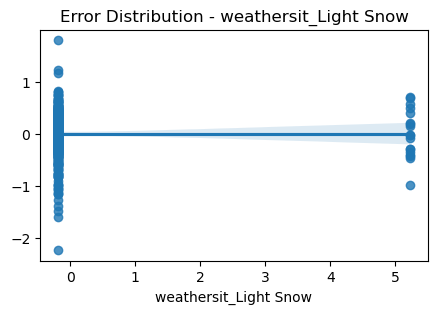

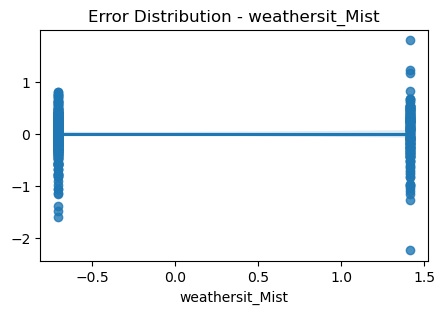

In [75]:
for x in Final_predictors:
    plt.figure(figsize=(5,3))
    #creating Regplot
    sns.regplot(x = X_train_model4[x], y = error)
    plt.title('Error Distribution - ' + x)
    plt.show()

<font color = green> **Observations:**</font>  From the above chart we can confirm that errors are following Homoscedasticity which means there is no trend observed in the error variance across all the predictors

<hr>

## <font color = blue> Predictions on the Test Set </font>

In [76]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

# Keep only the predictors of final model
X_test_model4 = X_test[list(X_train_model4.columns)]

In [77]:
# Making predictions using the fourth model
y_test_pred_model4 = model4.predict(X_test_model4)

#### Model Evaluation by checking the R-squared on the test set

In [78]:
r2_score(y_test, y_test_pred_model4)

0.798851158610055

<font color = red> **Conclusion:**</font> R2 score of test dataset is **0.799** and for train dataset it is **0.825**. This shows that final model (Model 4) is accurately explaining the variance of test dataset. **This model 4 is fit to use to make predictions**.

#### Visualizing the fit on the test set

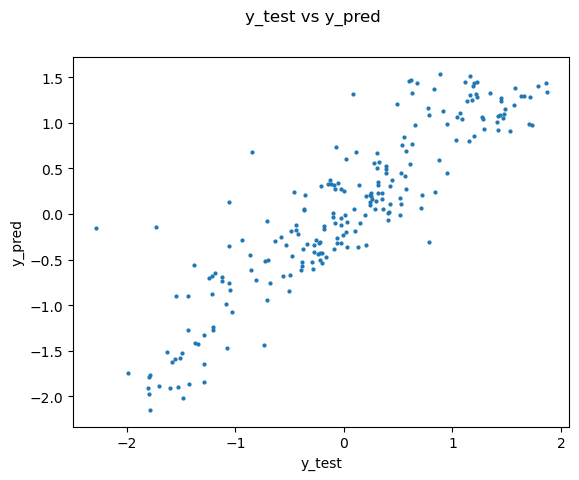

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_model4, s = np.pi*1.3)
fig.suptitle('y_test vs y_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')
plt.show()

<hr>

## <font color = blue> Final Model Predictors </font>

1. **const** - Intercept - Intercept value is almost zero based on the final model
2. **workingday** - working day or not - positive weak trend observed. 
3. **temp** - **positive strong** trend observed. Higher the temperature, higher is the bike demand
4. **season_spring** - Spring season has shown **negative strong** trend with bike demand. It means that people has less preferred to use bike in spring season
5. **yr_2019** - 2019 year has shown **positive strong** trend with bike demand. Bike demand is higher in year 2019 w.r.t year 2018.
6. **mnth_09 Sep** and **mnth_10 Oct** - September and October month has shown weak positive trend with bike demand.
7. **weekday_06 Sat** - Saturday has shown weak positive trend with bike demand.
8. **weathersit_Light Snow** and **weathersit_Mist** - Weather situation like Mist and Light snow have shown **negative strong** trend with bike demand. 